In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [75]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


-0.2024633654856539

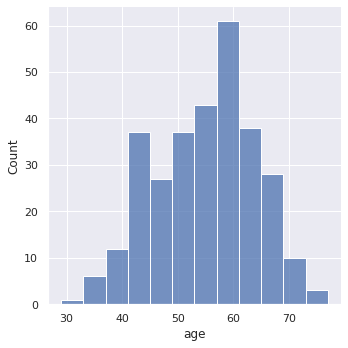

In [78]:
sns.displot(data["age"])
data.age.skew()

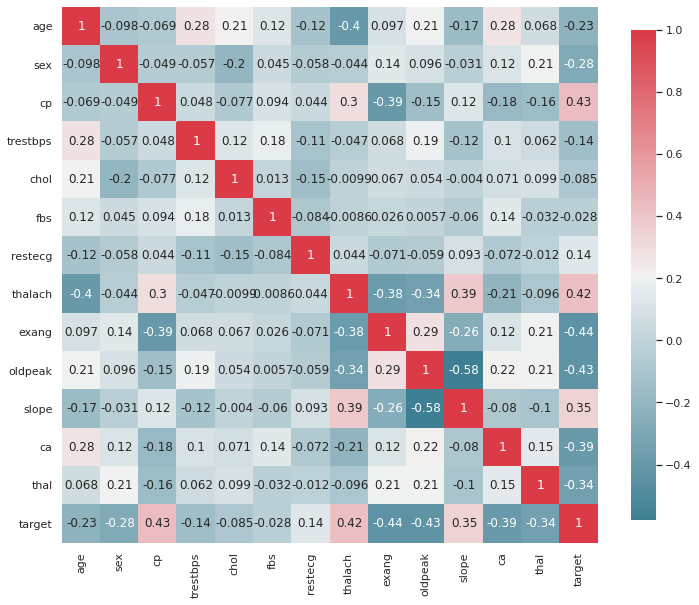

In [79]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    
plot_correlation_map( data )

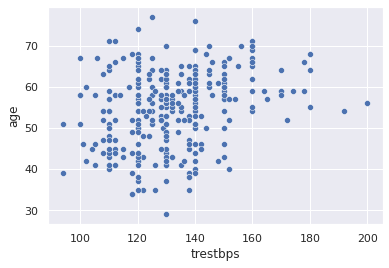

In [80]:
sns.scatterplot(y=data["age"],x=data.trestbps)

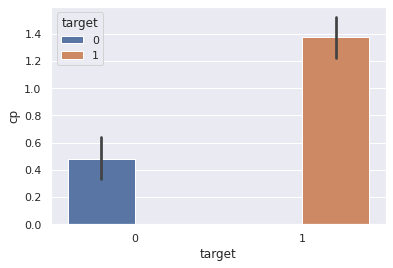

In [81]:
sns.barplot(x='target',y='cp',data=data, estimator=np.mean, hue='target')

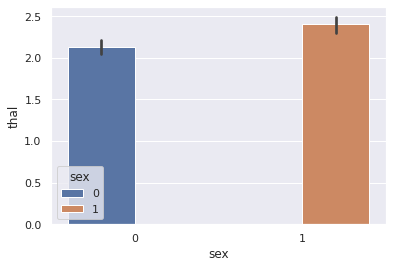

In [82]:
sns.barplot(x='sex',y='thal',data=data, estimator=np.mean, hue='sex')

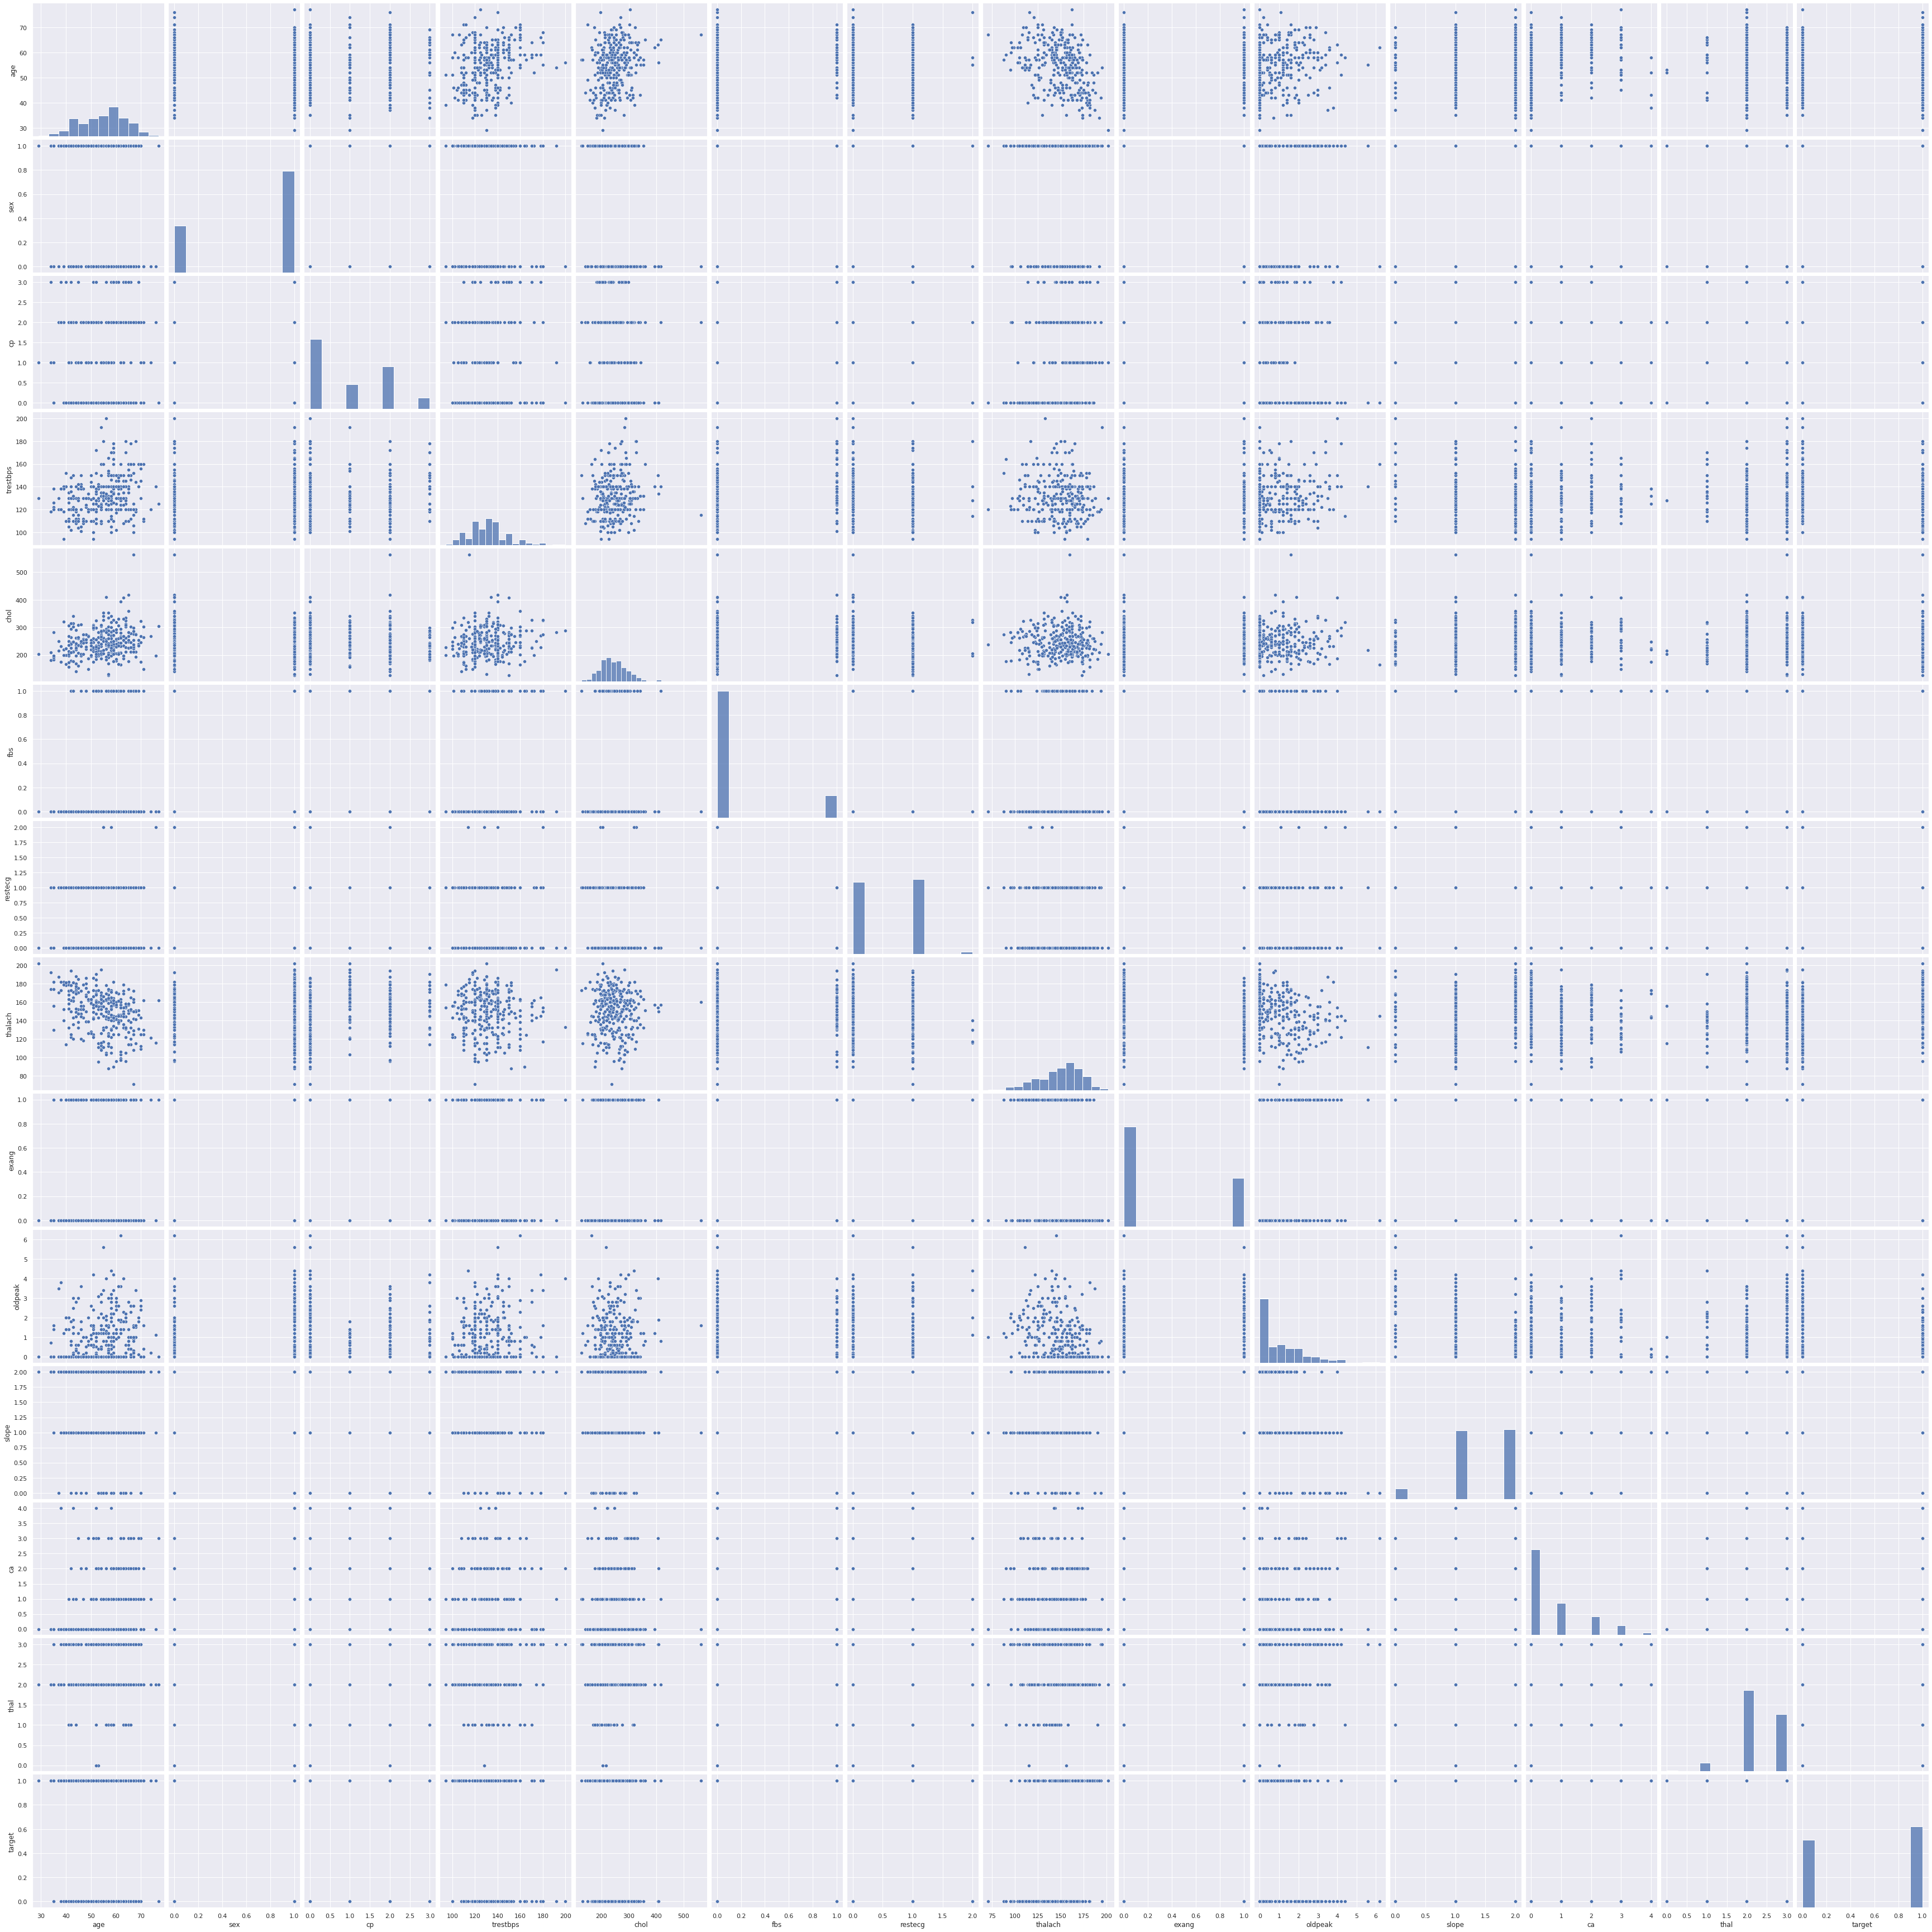

In [83]:
#Pairplots to visualize strong correlation
sns.set()
cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
sns.pairplot(data, height = 3.5)
plt.show();

In [86]:
#Logistic Regression
#Features extraction
x = data[['cp']]
y = data['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
LR = logreg.score(x_test, y_test)
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.84


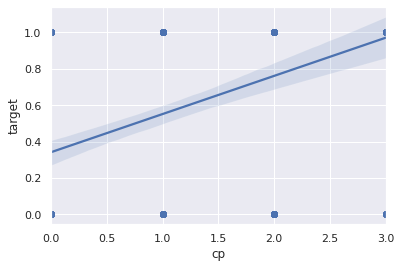

In [87]:
sns.regplot(x=x,y=y,data=data)

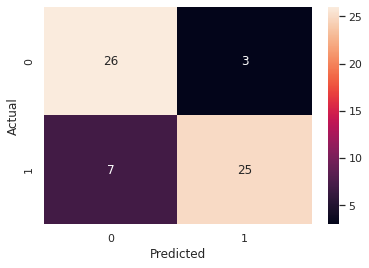

In [88]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

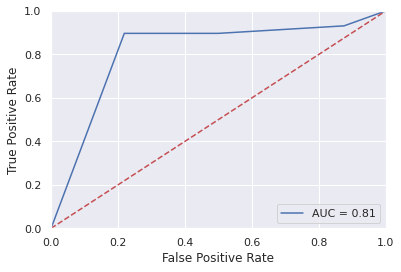

In [89]:
from sklearn import metrics

fpr,tpr, thres =  metrics.roc_curve(y_test==0, logreg.predict_proba(x_test)[:,0])
roc_auc = metrics.auc(fpr,tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [91]:
#Random forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators = 50)
RF =  metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model


Accuracy: 0.8360655737704918


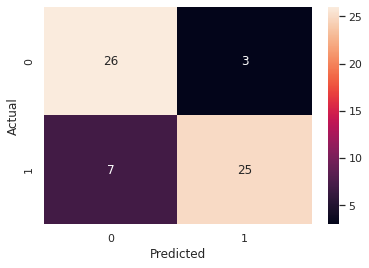

In [92]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
#K-fold cross validation
score = cross_val_score(clf,x,y, cv=5)
CV = sum(score)/5
print("Accuracy on each fold : ", score)
print("The average accuracy : " ,sum(score)/5)

Accuracy on each fold :  [0.7704918  0.7704918  0.73770492 0.78333333 0.73333333]
The average accuracy :  0.7590710382513661


In [ ]:
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Decision Tree
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
DT = accuracy_score(y_test, y_pred)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8360655737704918


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
KNN = accuracy_score(y_pred,y_test)
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.8360655737704918


In [ ]:
Models = {"Models":["Logistic Regression","KNN","Decision Tree","Random Forest","K-fold Cross Validation"],
          "Accuracy":[LR,KNN,DT,RF,CV]}
df = pd.DataFrame(Models)
df


,Models,Accuracy
0,Logistic Regression,0.836066
1,KNN,0.836066
2,Decision Tree,0.836066
3,Random Forest,0.836066
4,K-fold Cross Validation,0.759071


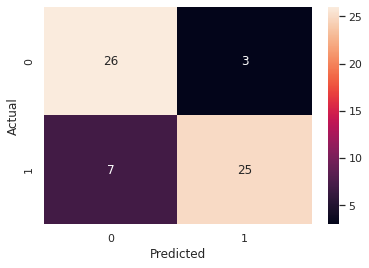

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

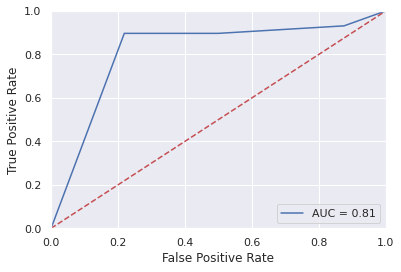